In [3]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from numpy import asarray
import cv2
from IPython.display import SVG, Image
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from keras.layers import BatchNormalization, Activation, MaxPooling2D
from livelossplot.tf_keras import PlotLossesCallback

img_size, batch_size = 48, 64

In [28]:
""" train_0 = train[train.emotion == 0]
train_1 = train[train.emotion == 1]
train_2 = train[train.emotion == 2]
train_3 = train[train.emotion == 3]
train_4 = train[train.emotion == 4]
train_5 = train[train.emotion == 5]
train_6 = train[train.emotion == 6]

test_0 = test[test.emotion == 0]
test_1 = test[test.emotion == 1]
test_2 = test[test.emotion == 2]
test_3 = test[test.emotion == 3]
test_4 = test[test.emotion == 4]
test_5 = test[test.emotion == 5]
test_6 = test[test.emotion == 6] """

' train_0 = train[train.emotion == 0]\ntrain_1 = train[train.emotion == 1]\ntrain_2 = train[train.emotion == 2]\ntrain_3 = train[train.emotion == 3]\ntrain_4 = train[train.emotion == 4]\ntrain_5 = train[train.emotion == 5]\ntrain_6 = train[train.emotion == 6]\n\ntest_0 = test[test.emotion == 0]\ntest_1 = test[test.emotion == 1]\ntest_2 = test[test.emotion == 2]\ntest_3 = test[test.emotion == 3]\ntest_4 = test[test.emotion == 4]\ntest_5 = test[test.emotion == 5]\ntest_6 = test[test.emotion == 6] '

In [18]:
# os.mkdir('train')
# os.mkdir('test')

In [27]:
""" from PIL import Image

os.mkdir("train/neutral")
for i, row in train_6.iterrows():
    pixels = list(row["pixels"].split(' '))
    pixels = np.asarray(pixels, dtype=np.uint8)
    pixels = pixels.reshape((48, 48))
    path_file_name = os.path.join('train/neutral', 'train_neutral_'+str(i)+'.jpg')
    cv2.imwrite(path_file_name, pixels)

os.mkdir("test/neutral")
for i, row in test_6.iterrows():
    pixels = list(row["pixels"].split(' '))
    pixels = np.asarray(pixels, dtype=np.uint8)
    pixels = pixels.reshape((48, 48))
    path_file_name = os.path.join('test/neutral', 'test_neutral_'+str(i)+'.jpg')
    cv2.imwrite(path_file_name, pixels) """

' from PIL import Image\n\nos.mkdir("train/neutral")\nfor i, row in train_6.iterrows():\n    pixels = list(row["pixels"].split(\' \'))\n    pixels = np.asarray(pixels, dtype=np.uint8)\n    pixels = pixels.reshape((48, 48))\n    path_file_name = os.path.join(\'train/neutral\', \'train_neutral_\'+str(i)+\'.jpg\')\n    cv2.imwrite(path_file_name, pixels)\n\nos.mkdir("test/neutral")\nfor i, row in test_6.iterrows():\n    pixels = list(row["pixels"].split(\' \'))\n    pixels = np.asarray(pixels, dtype=np.uint8)\n    pixels = pixels.reshape((48, 48))\n    path_file_name = os.path.join(\'test/neutral\', \'test_neutral_\'+str(i)+\'.jpg\')\n    cv2.imwrite(path_file_name, pixels) '

In [4]:
emotions = ["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

train_gen = train_datagen.flow_from_directory("train/", target_size=(img_size, img_size), color_mode="grayscale", batch_size=batch_size, class_mode="categorical", shuffle=True)
validation_gen = validation_datagen.flow_from_directory("test/", target_size=(img_size, img_size), color_mode="grayscale", batch_size=batch_size, class_mode="categorical", shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [6]:
model = Sequential()

# 1. Conv
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(img_size, img_size,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


# 2. Conv Layer
model.add(Conv2D(128, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 3. Conv Layer
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#4. Conv Layer
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))
model.compile(optimizer=Adam(lr=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

c:\Python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


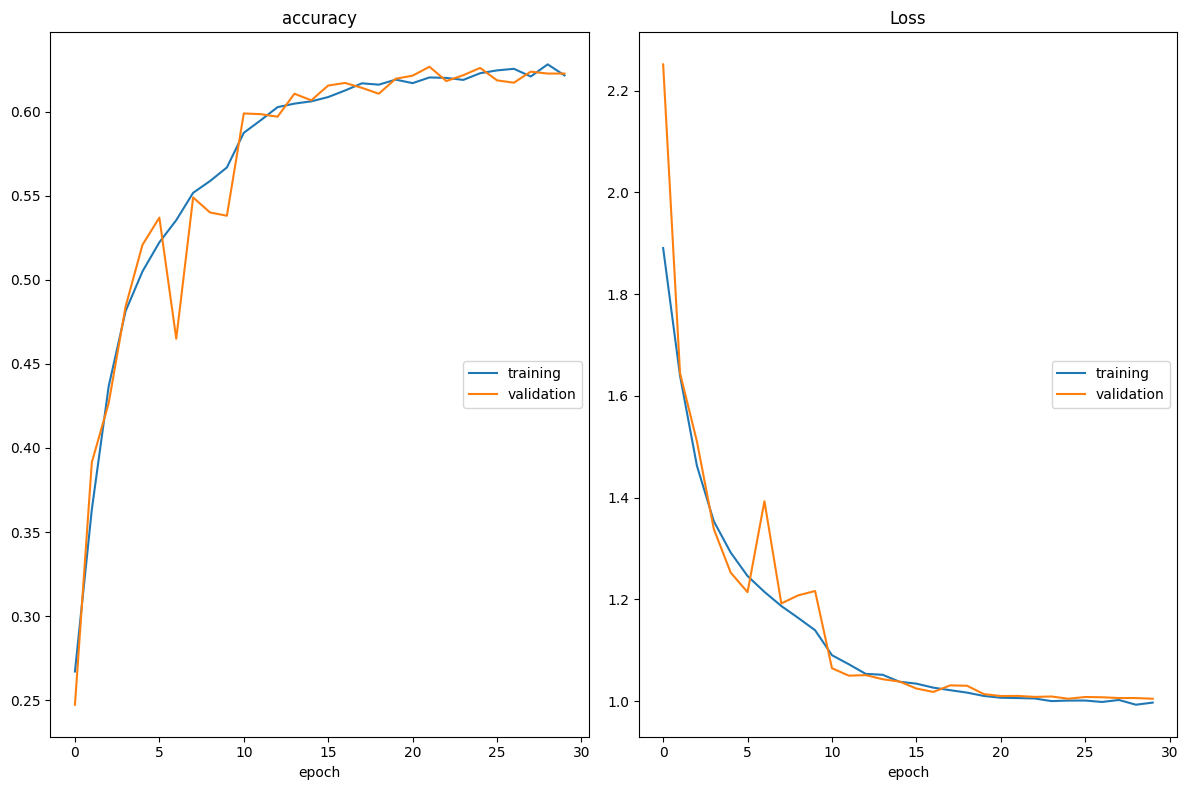

accuracy
	training         	 (min:    0.267, max:    0.628, cur:    0.622)
	validation       	 (min:    0.247, max:    0.627, cur:    0.623)
Loss
	training         	 (min:    0.993, max:    1.890, cur:    0.997)
	validation       	 (min:    1.005, max:    2.251, cur:    1.005)

Epoch 30: saving model to model_weights_v1.h5
448/448 [==============================] - 221s 494ms/step - loss: 0.9971 - accuracy: 0.6215 - val_loss: 1.0046 - val_accuracy: 0.6226 - lr: 1.0000e-05


In [7]:
epochs = 30
steps_per_epoch = train_gen.n // train_gen.batch_size
validation_steps = validation_gen.n // validation_gen.batch_size

checkpoint = ModelCheckpoint("model_weights_v1.h5", monitor='val_accuracy', save_weights_only=True, mode='max', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.00001, model='auto')
callbacks=[PlotLossesCallback(), checkpoint, reduce_lr]

history = model.fit(x=train_gen, steps_per_epoch=steps_per_epoch, epochs=epochs, validation_data=validation_gen, validation_steps=validation_steps, callbacks=callbacks)


In [8]:
model_json = model.to_json()

with open("model.json", "w") as json_file1:
    json_file1.write(model_json)
print('Model Saved')
model.save_weights('model_weights.h5')
print('Weights saved')

Model Saved
Weights saved
